In [3]:
#! python3

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tikzplotlib as tpl
import os

from matplotlib import rc

rc('font', **{'family': 'sans-serif', 'sans-serif': 'cm'})
rc('text', **{'usetex': True,
              'latex.preamble': r'\renewcommand{\familydefault}{\sfdefault}'
              r' \usepackage{sansmath} \sansmath'})
rc('figure', **{'dpi': 200})


def plot_data(data, **kwargs):
    ax = kwargs.pop('ax', plt.gca())
    color = kwargs.pop('color', 'black')
    label = kwargs.pop('label', '')
    ls = kwargs.pop('ls', '-')
    data.groupby('step')\
        .mean()\
        .sort_values('elapsed_time')\
        .rolling(5).mean()\
        .plot('elapsed_time', 'test_mnll', style=ls, ax=ax, color=color, label=label)

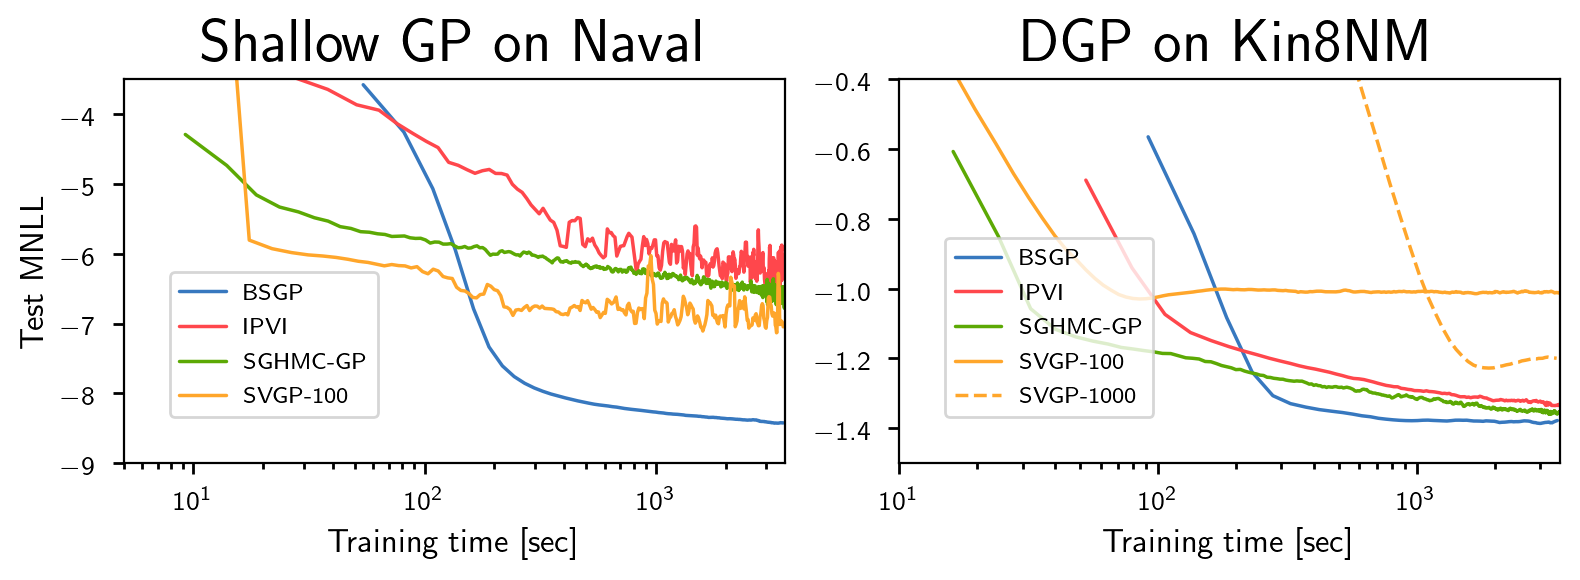

In [4]:
results = pd.read_json('./workspace/training-time/full_training_timings.json')
results = results[results.dataset == 'naval']

fig, axs = plt.subplots(1, 2, figsize=[8, 3])


ax = axs[0]
plot_data(results[results.model == 'bsgp'], color='xkcd:windows blue', label='BSGP', ax=ax)
plot_data(results[results.model == 'ipvi'], color='xkcd:light red', label='IPVI', ax=ax)
plot_data(results[results.model == 'sghmc-gp'], color='xkcd:leaf green', label='SGHMC-GP', ax=ax)
plot_data(results[(results.model == 'svgp') & (results.num_inducing == 100)], ax=ax, color='xkcd:mango', label='SVGP-100')

ax.margins(0, 0.1)
ax.set_ylim(-9, -3.5)
ax.set_xlim(5,)

ax.set_xlabel('Training time [sec]')
ax.set_ylabel('Test MNLL')
ax.set_title('Shallow GP on Naval');
ax.semilogx()

results = pd.read_json('workspace/training-time/full_training_timings.json')
results = results[results.dataset == 'kin8nm']

ax = axs[1]
plot_data(results[results.model == 'bsgp'], color='xkcd:windows blue', label='BSGP', ax=ax)
plot_data(results[results.model == 'ipvi'], color='xkcd:light red', label='IPVI', ax=ax)
plot_data(results[results.model == 'sghmc-gp'], color='xkcd:leaf green', label='SGHMC-GP', ax=ax)

_results = pd.read_json('workspace/training-time/training_times_svgp.json')
results = _results[_results.dataset == 'kin8nm']
plot_data(results[(results.model == 'svgp') & (results.num_inducing == 100)], ax=ax, color='xkcd:mango', label='SVGP-100')
plot_data(results[(results.model == 'svgp') & (results.num_inducing == 1000)], ax=ax, color='xkcd:mango', label='SVGP-1000', ls='--')

ax.margins(0, 0.1)
ax.set_ylim(-1.5, -.4)
ax.set_xlim(10,)
ax.set_xlabel('Training time [sec]')
ax.set_title('DGP on Kin8NM');
ax.semilogx()

plt.savefig('figures/train-time.png', dpi=300)
plt.show()